In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# pd.set_option('display.max_columns', None)


df = pd.read_csv('../../data/cluster.csv')
df['date'] = pd.to_datetime(df['date'])

**Definizione features**

In [10]:
df['year'] = df.date.dt.year
column = ['n_participants_child', 'n_participants_teen',  'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_arrested', 'n_unharmed', 'n_injured', 'n_participants']
mean_state_year = df.groupby(['year', 'state'])[column].mean(column).reset_index()

df = df.merge(mean_state_year, on=['year', 'state'], suffixes=('', '_mean')).drop(columns=['year'])

final_df = pd.DataFrame()
final_df['date'] = df['date']
final_df['state'] = df['state']

final_df['ratio_n_participants_child_mean'] = df['n_participants_child']/df['n_participants_child_mean']
final_df['ratio_n_participants_teen_mean'] = df['n_participants_teen']/df['n_participants_teen_mean']
final_df['ratio_n_participants_adult_mean'] = df['n_participants_adult']/df['n_participants_adult_mean']
final_df['ratio_n_males_mean'] = df['n_males']/df['n_males_mean']
final_df['ratio_n_females_mean'] = df['n_participants_adult']/df['n_males_mean']
final_df['ratio_n_killed_mean'] = df['n_killed']/df['n_killed_mean']
final_df['ratio_n_arrested_mean'] = df['n_arrested']/df['n_arrested_mean']
final_df['ratio_n_unharmed_mean'] = df['n_unharmed']/df['n_unharmed_mean']
final_df['ratio_n_injured_mean'] = df['n_injured']/df['n_injured_mean']
final_df['ratio_n_participants_mean'] = df['n_participants']/df['n_participants_mean']

final_df['n_participants_child_ratio'] = df['n_participants_child'] / df['n_participants']
final_df['n_participants_teen_ratio'] = df['n_participants_teen'] / df['n_participants']
final_df['n_participants_adult_ratio'] = df['n_participants_adult'] / df['n_participants']

final_df['n_males_ratio'] = df['n_males']/df['n_participants']
final_df['n_females_ratio'] = df['n_females']/df['n_participants']

final_df['n_arrested_ratio'] = df['n_arrested']/df['n_participants']
final_df['n_unharmed_ratio'] = df['n_unharmed']/df['n_participants']
final_df['n_injured_ratio'] = df['n_injured']/df['n_participants']
final_df['n_killed_ratio'] = df['n_killed']/df['n_participants']

final_df['poverty_ratio'] = df['povertyPercentage']/100

final_df['incident_severity'] = (final_df['n_killed_ratio'] + final_df['n_injured_ratio'])/df['n_participants']

final_df["winner_dominance"]= df["candidatevotes"]/df["totalvotes"] #TODO rimuovere se non serve perché elimina tanti valori 

final_df.dropna(inplace=True)

**Correlation Matrix**

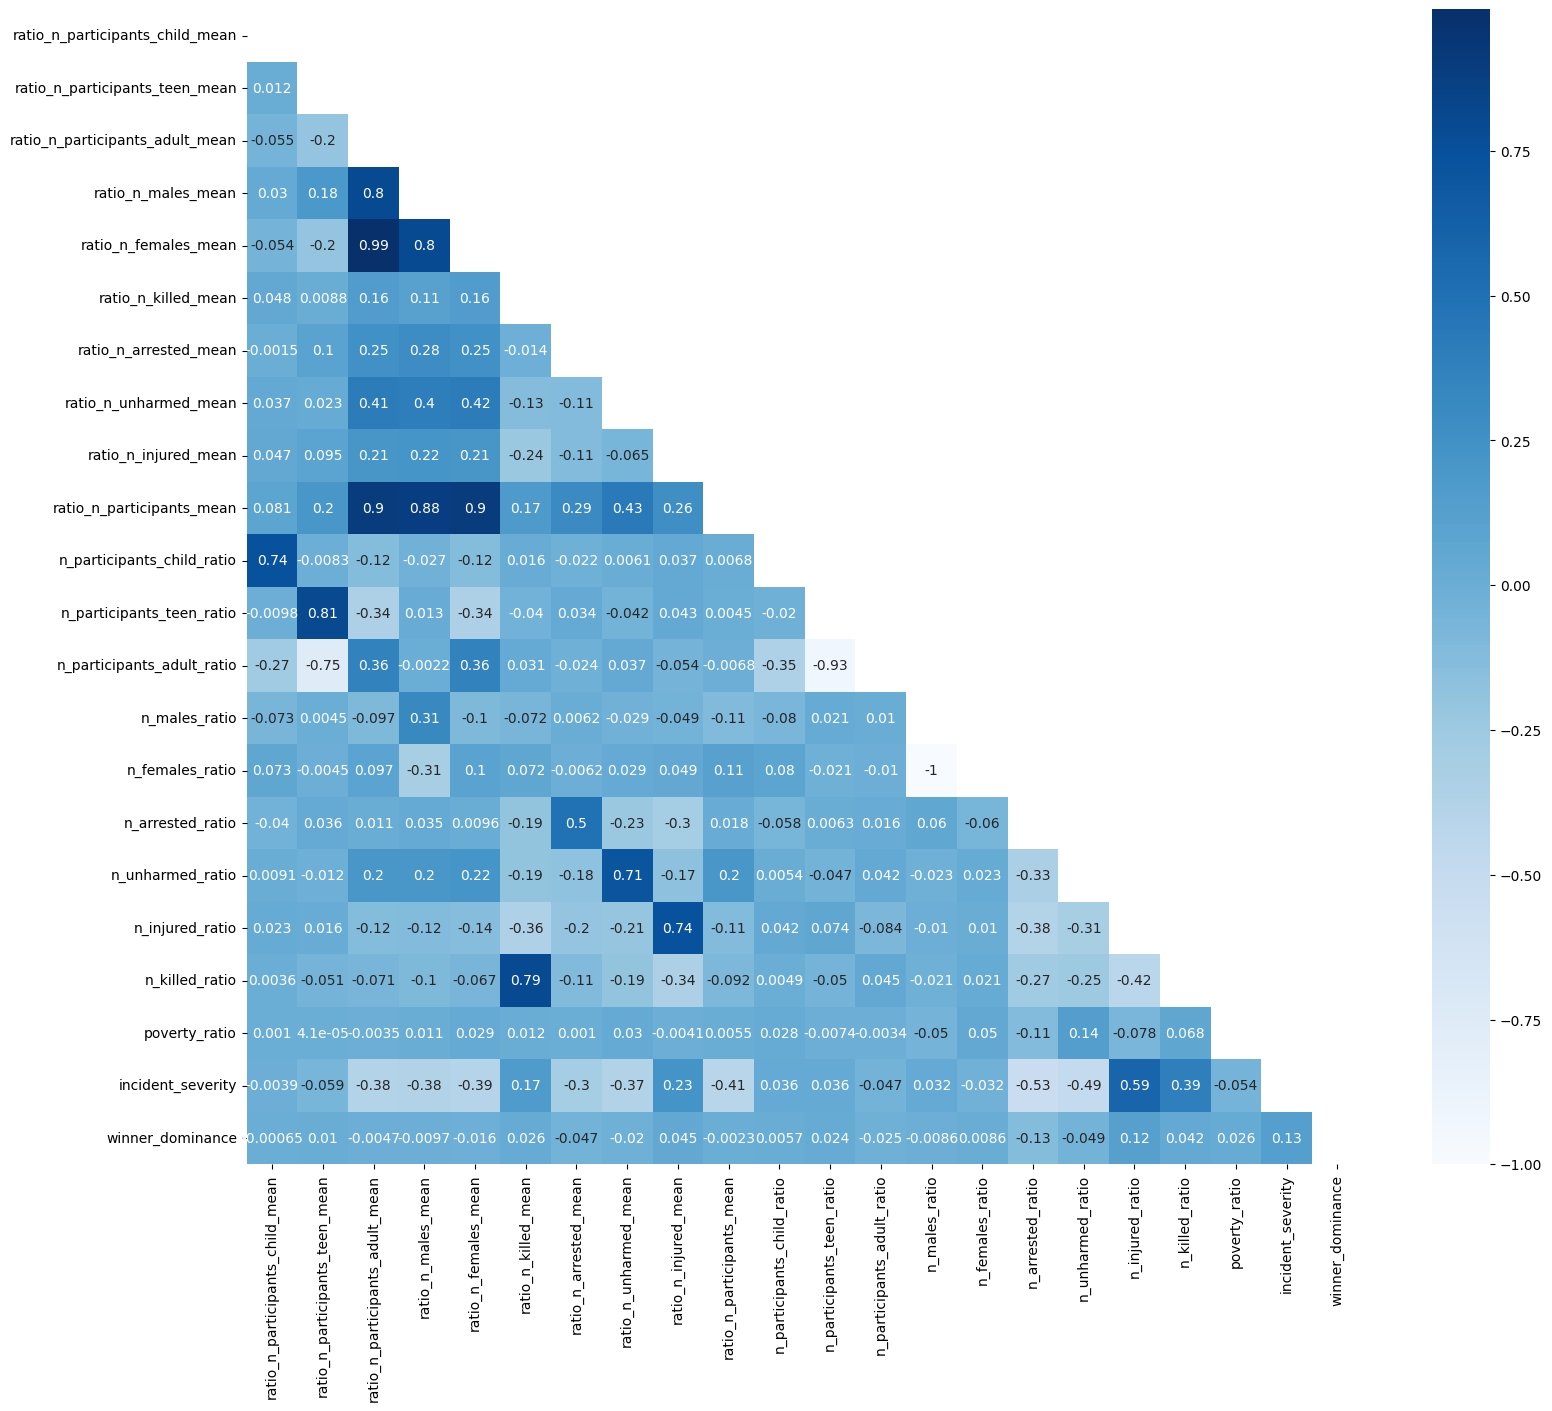

In [11]:
import seaborn as sns
import numpy as np

data = final_df.drop(columns=['date', 'state']).corr()
mask = np.triu(np.ones_like(data, dtype=bool))

plt.figure(figsize=(18,15))
sns.heatmap(data, annot=True, cmap='Blues', mask=mask)
plt.show()

**Features Distribution**

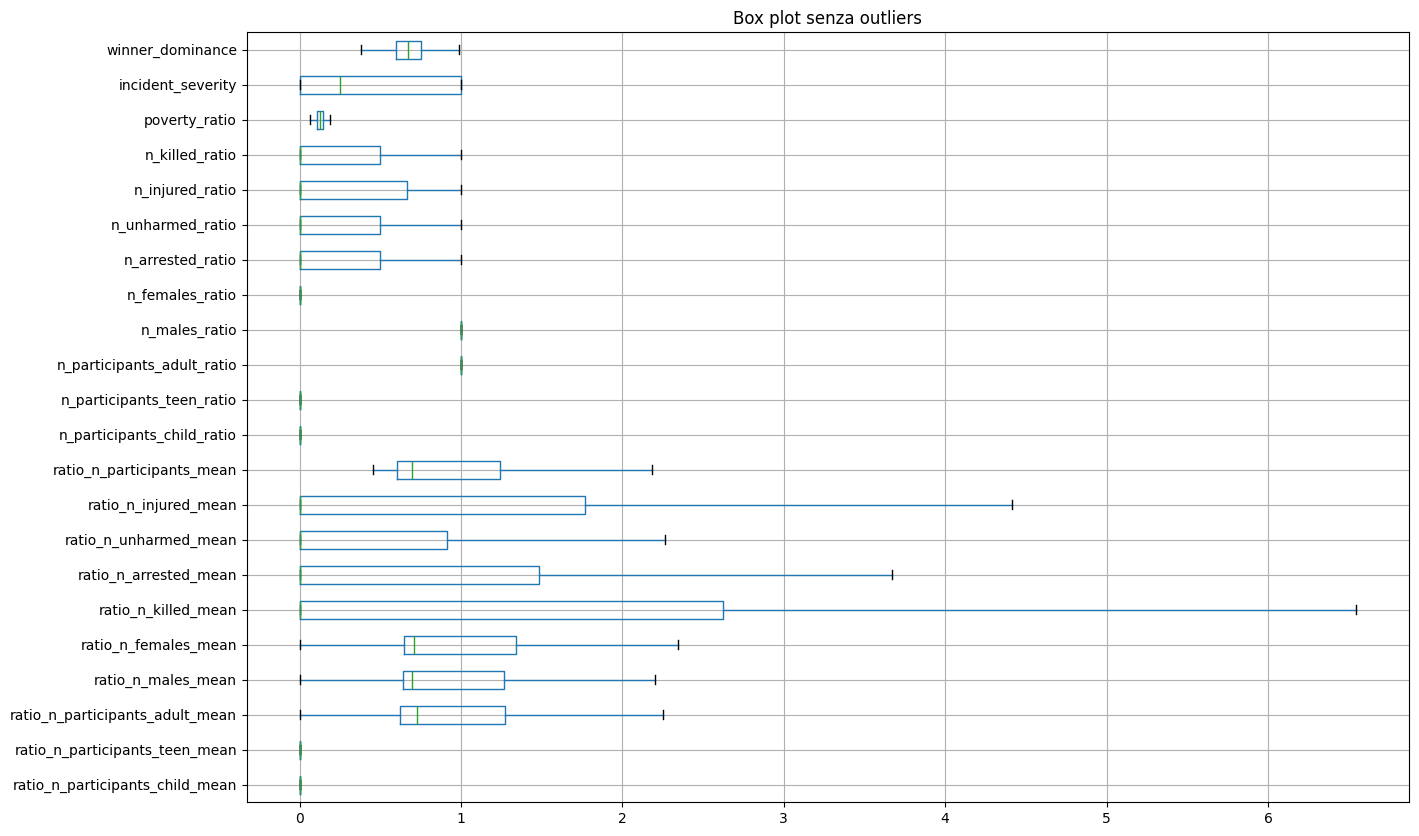

In [12]:
final_df.boxplot(vert=False, figsize=(15, 10), showfliers=False)
plt.title('Box plot senza outliers')
plt.show()

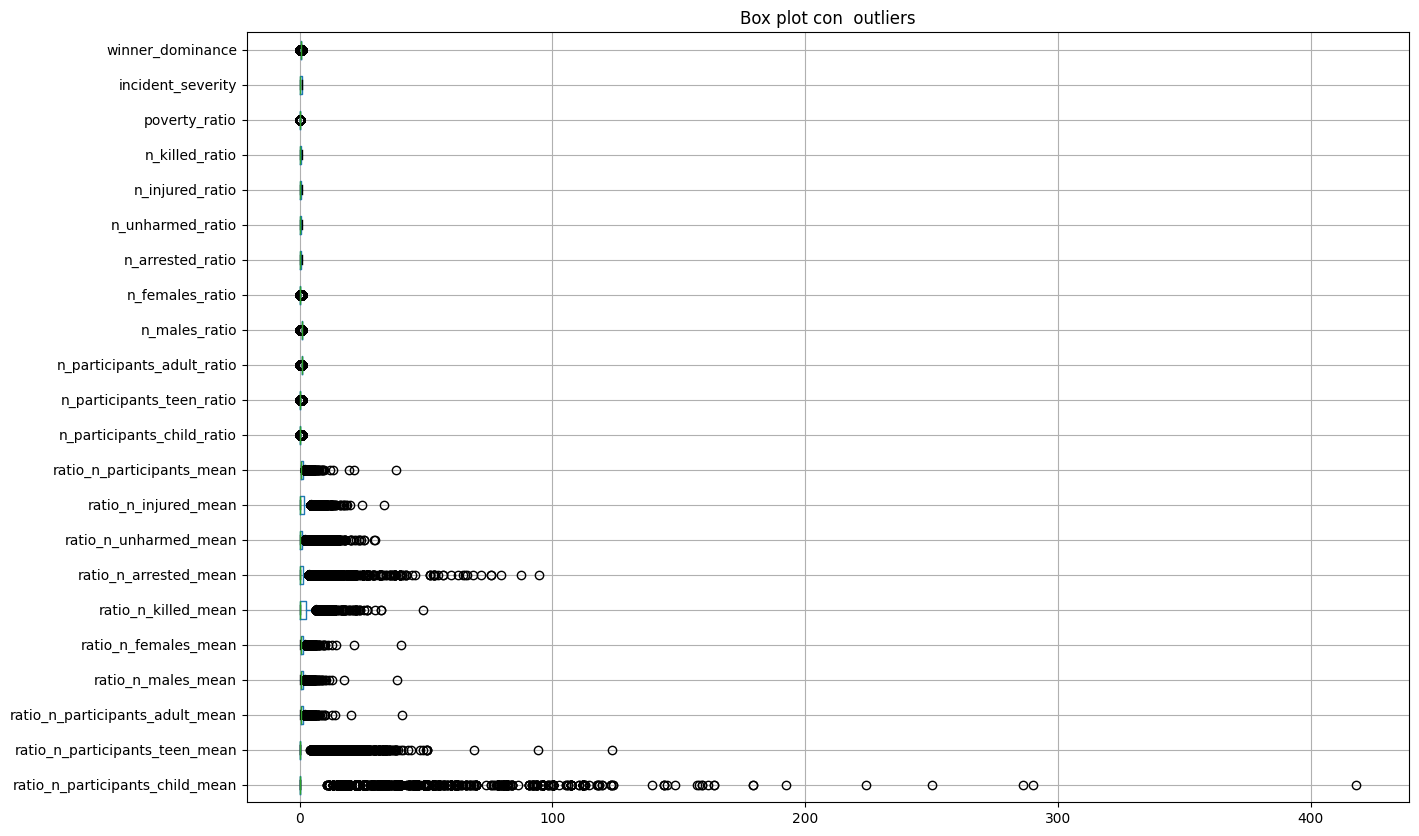

In [13]:
final_df.boxplot(vert=False, figsize=(15, 10), showfliers=True)
plt.title('Box plot con  outliers')
plt.show()

**Salvataggio file** 

In [14]:
final_df.to_csv('../../data/newFeatures.csv', index=False)